In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [35]:
data=pd.read_csv("data_for_lr.csv")


In [36]:
data.head(10)


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [43]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))


Shape of the dataset = (699, 2)


# splitting data


In [44]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# testing dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# <font color="green">LINEAR REGRESSION</font>

# Forward propagation



f(x)=m*x+c

In [45]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

# Defining Cost Function


In [46]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [47]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives


In [48]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

In [49]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 1796.6417397001082


<Figure size 640x480 with 0 Axes>

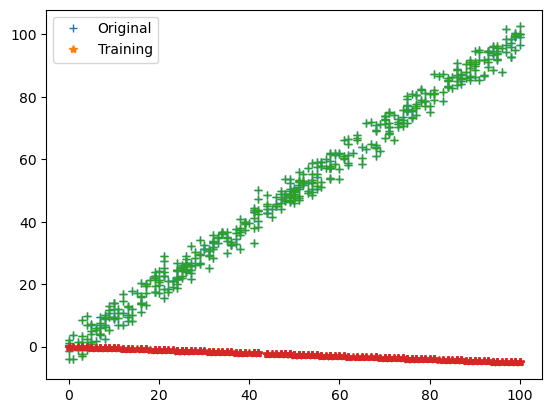

Iteration = 2, Loss = 817.2780240904293


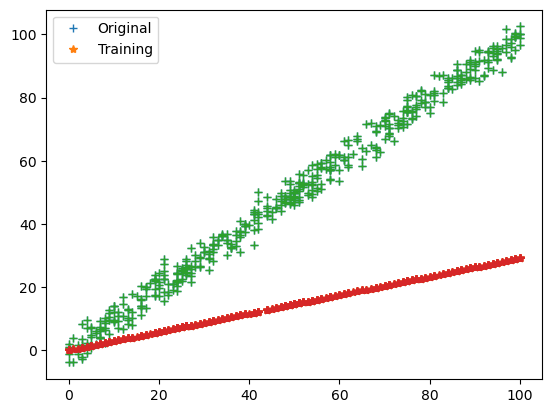

Iteration = 3, Loss = 372.93962136085185


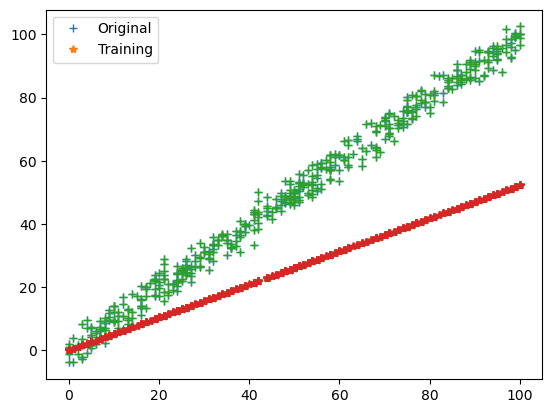

Iteration = 4, Loss = 171.34279570107256


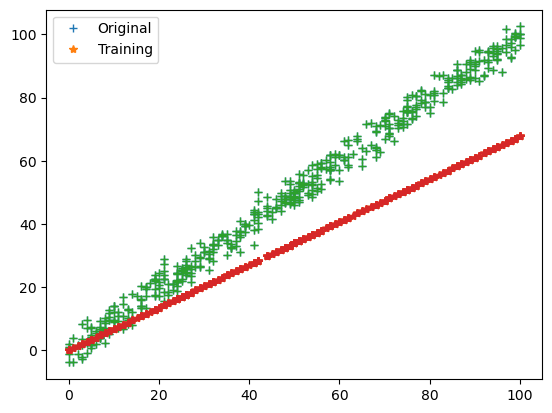

Iteration = 5, Loss = 79.87809242844453


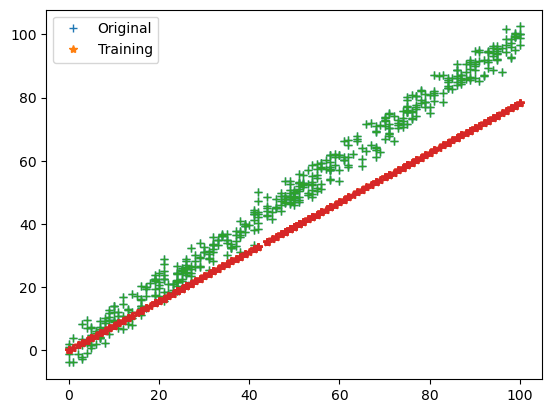

Iteration = 6, Loss = 38.3804550697536


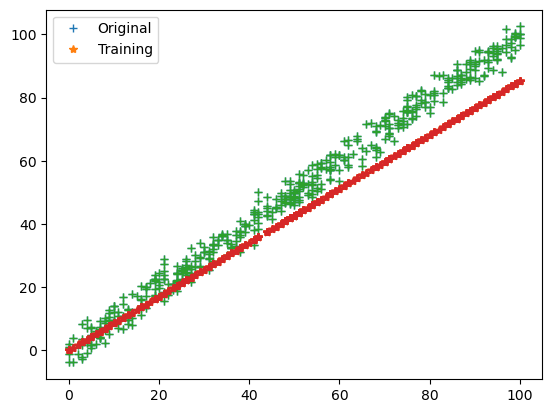

Iteration = 7, Loss = 19.552930861806185


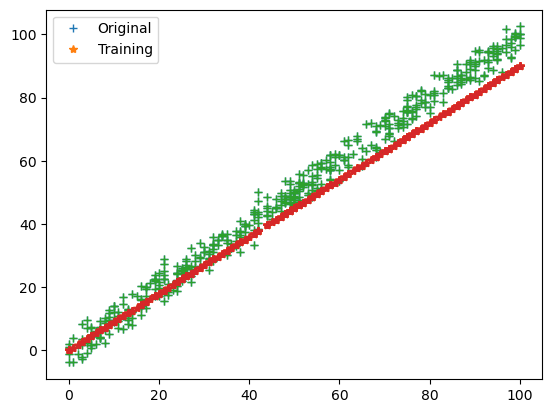

Iteration = 8, Loss = 11.010862100711527


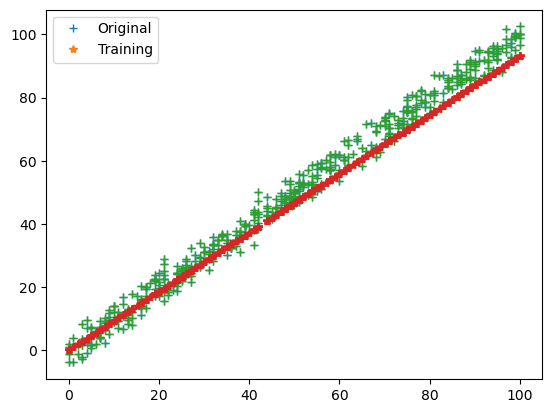

Iteration = 9, Loss = 7.135315868457104


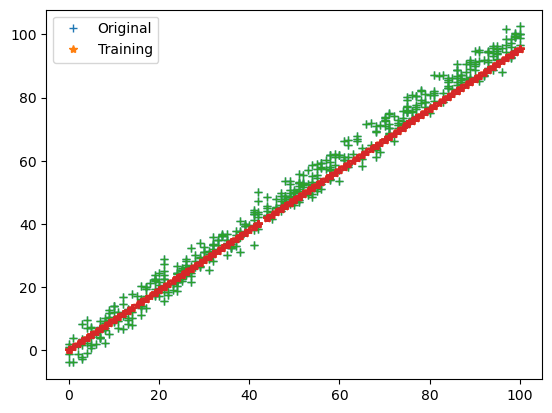

Iteration = 10, Loss = 5.3769760763789


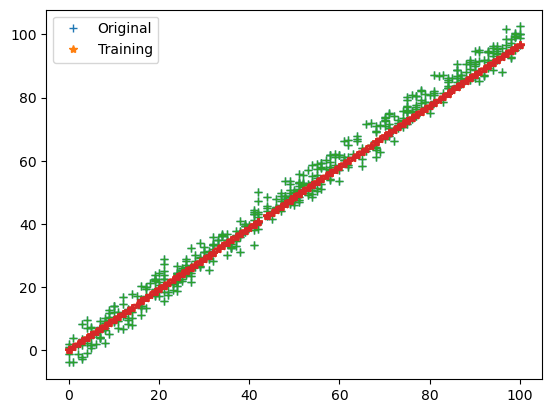

Iteration = 11, Loss = 4.579215191322534


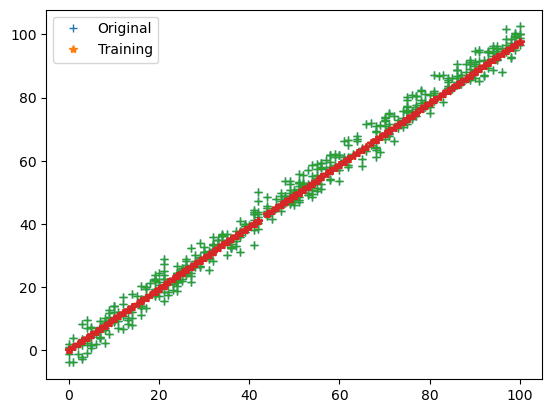

Iteration = 12, Loss = 4.217270020367515


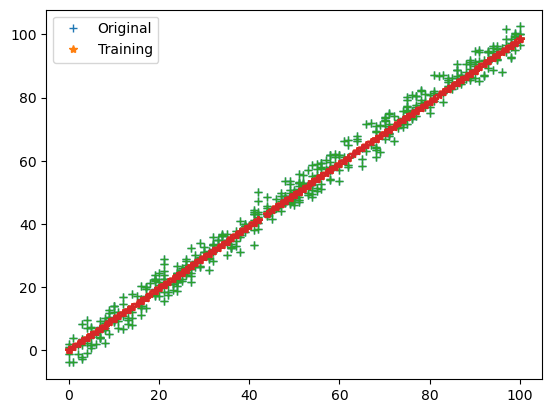

Iteration = 13, Loss = 4.05305492163647


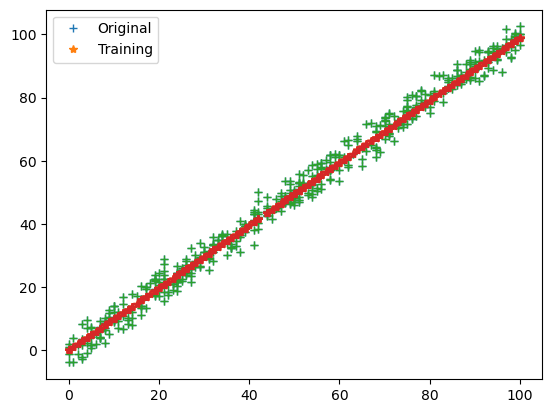

Iteration = 14, Loss = 3.9785501756961783


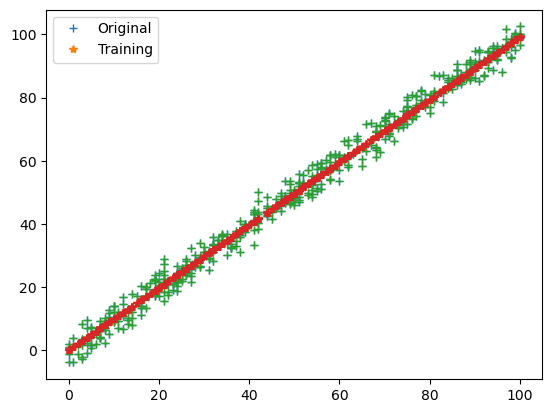

Iteration = 15, Loss = 3.9447471161926826


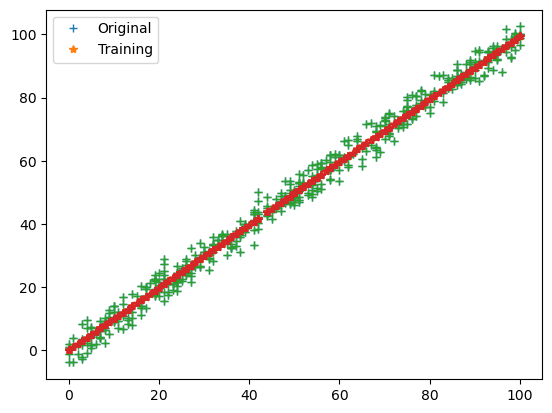

Iteration = 16, Loss = 3.9294104569171813


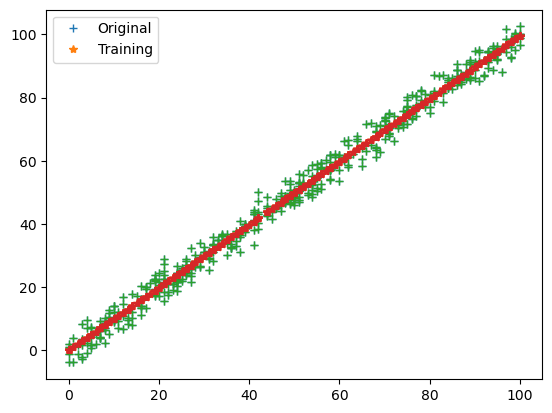

Iteration = 17, Loss = 3.9224520238880185


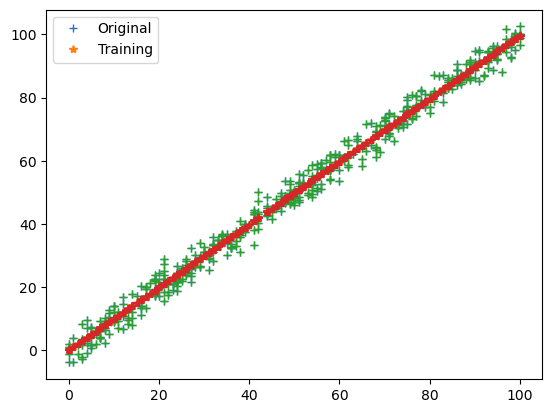

Iteration = 18, Loss = 3.9192948013956395


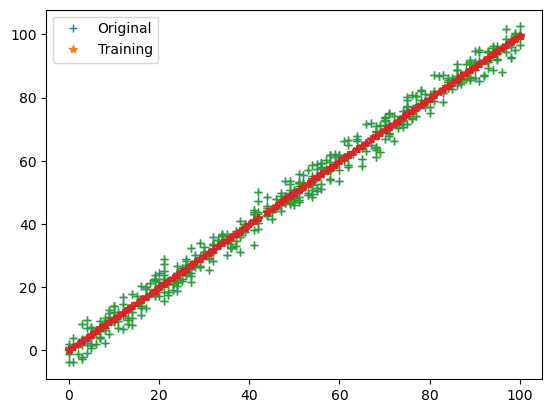

Iteration = 19, Loss = 3.9178621923429264


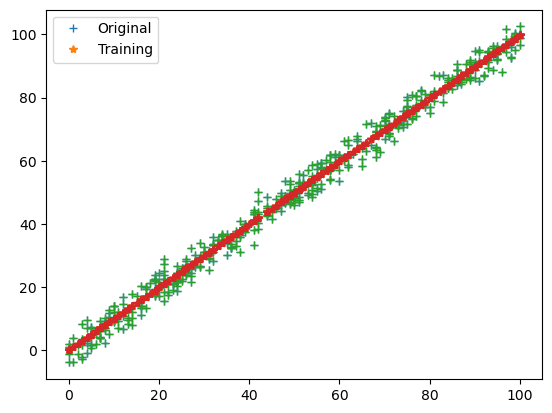

Iteration = 20, Loss = 3.917212042326794


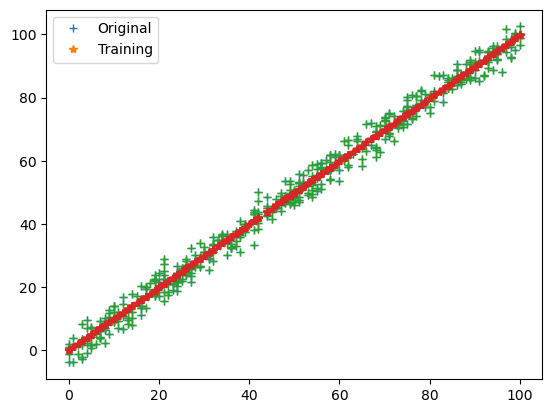

In [52]:
parameters, loss = train(train_input, train_output, 0.0001, 20)


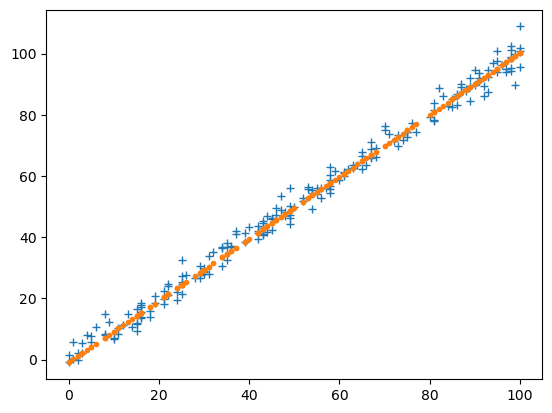

In [51]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()